# Py: Clustering Credit Card Fraud
**This notebook was originally created by Amanda Aitken for the Data Analytics Applications subject, as *Case study 2 - Credit card fraud detection* in the *DAA M06 Unsupervised learning* module.**

**The Data Analytics Application is a Fellowship Applications (Module 3) subject with the Actuaries Institute that aims to teach students how to apply a range of data analytics skills, such as neural networks, natural language processing, unsupervised learning and optimisation techniques, together with their professional judgement, to solve a variety of complex and challenging business problems. The business problems used as examples in this subject are drawn from a wide range of industries.**

**Find out more about the course [here](https://www.actuaries.asn.au/education-program/fellowship/subjects-and-syllabus/data-analytics-applications-subject).**

### Define the problem
Fraud involves deceptive actions that are taken with the intention of illegally or unethically gaining something at the expense of others. Some examples of fraud include:
 * stealing another person’s credit card details and using these to purchase goods;
 * providing false information to an insurance company to obtain an insurance benefit that you are not entitled to; and
 * using another person’s personal information, without their permission, to commit a crime or to deceive or defraud that other person.

In July 2019, the Centre for Counter Fraud Studies at the University of Portsmouth estimated that fraud costs the global economy [£3.89 trillion, with losses from fraud rising by 56% in the past decade](https://www.crowe.com/uk/croweuk/insights/financial-cost-of-fraud-2019). Fraudulent behaviour can occur in any industry, including in many of the industries that actuaries typically work in, such as banking and finance.

Fraud detection is a set of activities that are undertaken to identify fraud. Fraud detection can help to rectify the outcomes of any fraudulent behaviour and/or to prevent fraud from occurring in the future.

### Identifying Fraud:

Some methods that can be used to detect fraud are:
 * reputation list;
 * rules engine;
 * supervised machine learning; and
 * unsupervised machine learning.
 
A **reputation list**, or ‘blacklist’, is a relatively static list of known fraudulent identities. For example, a bank’s ‘blacklist’ might include a list of individuals who have previously been convicted of credit card fraud. A drawback of this method is that it is difficult to keep the reputation list up-to-date and it often requires identities to have been found committing fraudulent behaviour in the past before they can be added to the list.

A **rules engine** approach to fraud detection involves running a set of rules over an activity. If the activity meets one of the rules, it might be further investigated manually. For example, a retailer might use a rules engine to flag any potentially fraudulent online purchases. They might, for example, flag for further investigation any transactions that are over a certain volume or that are being requested for delivery to a foreign country. While rules engines have the benefit of being easy to understand, they can also be hard to keep up-to-date with recent fraudulent activities.

A **supervised learning** approach to fraud detection involves training a computer to recognise future fraud by providing it with examples of past fraud. For example, a social media site might have a historical dataset that contains a list of new accounts and their attributes (‘features’) as well as a label to indicate whether each new account was opened by a legitimate customer (‘not fraud’) or by someone pretending to be a legitimate customer (‘fraud’). The classification techniques discussed in Module 5 could be used for this supervised learning approach to fraud detection.

Supervised learning, therefore, approximates a rules engine and might be used to create a rules engine. A drawback of this method is that it requires a large dataset of past examples of fraud which can be very ‘expensive’ to obtain, as the exercise of validating historical instances of fraud can be very time-consuming. In addition, past examples of fraud may not be a good indicator of the types of fraud to which an organisation could be subject in the future. In fact, there should be some anticipation that fraudsters will change their strategies over time when they see that their existing methods of fraud are thwarted or investigated.

**Unsupervised learning** is described in Video 6.6 as being the cutting-edge solution to fraud detection. As discussed in this module, one branch of unsupervised learning, clustering, involves finding subsets of a population that are like each other and different from other subsets. Clustering can be used in fraud detection in one of two ways:
 * by identifying outliers that are dissimilar to other observations and do not align closely with any of the clusters found in the dataset—these outliers are potential cases of fraud; or, conversely,
 * by identifying a cluster of observations, when all other observations appear to be more random and not tightly bunched together—this method is described in Video 6.6.

This notebook explores fraud detection using clustering techniques.

### References:
The datasets that are used in this case study were sourced from the following Kaggle competition: https://www.kaggle.com/c/ieee-fraud-detection.

The aim of the competition was to improve the efficacy of fraudulent transaction identification models.

The data originates from real-world e-commerce transactions and contains two different types of datasets. Note that the meaning of some of the features has been masked by the data provider, so it is not clear what all the features mean.

The first dataset contains the following features for each credit card transaction:
- TransactionDT: a measurement of the time since a given reference time (this is referenced on the Kaggle site as being 'timedelta' rather than an actual timestamp);
- TransactionAMT: the payment amount of the transaction in USD;
- ProductCD: the product code for each transaction;
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.;
- addr1: customer's billing region;
- addr2: customer's billing country;
- dist1 - dist 2: distances between, for example,billing address, mailing address, zip code, IP address, phone area, etc.;
- P_ and R_ emaildomain: purchaser and recipient email domain;
- C1 - C14: counting, such as how many addresses are found to be associated with the payment card, etc. (the actual meaning of these fields was masked in the Kaggle dataset);
- D1 - D15: timedeltas, such as days between previous transaction, etc;
- M1 - M9: matches, such as whether the name on the card matches the name of the customer etc;
- V1 - V339: these fields are described on the Kaggle competition site as 'Vesta engineered rich features, including ranking, counting, and other entity relations'. For example, one of these features might represent the number of times the payment card associated with a IP and email or address appeared in the transaction list in a 24 hour time range.

The training version of the transactions dataset also contains a 'TransactionID' identifier for each transaction and a label 'isFraud' to indicate whether the transaction was fraudulent.

The second dataset contains 'identity' features for each transaction. These features are described on Kaggle as being 'network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions'. These features were 'collected by Vesta’s fraud protection system and digital security partners'. The actual meaning of each of these fields is masked. These features have the following names:
- id_01 - id_38;
- DeviceType; and
- DeviceInfo.

Both the transactions and identity datasets also contain a 'TransactionID' column that allows the two datasets to be joined together.

The above information about the features contained in these datasets was sourced from the following Kaggle webpage: https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203. 

## Packages
This section installs packages that will be required for this exercise/case study.

In [1]:
# Packages for data management and mathematical operations.
import pandas as pd
import numpy as np

# Package for plotting.
import matplotlib.pyplot as plt

# Scikit-learn libraries to perform clustering and evaluation.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score

# Package used in the confusion matrix function.
import itertools

## Functions
This section defines functions that will be used for this exercise/case study.

In [2]:
# Define a function that helps to format headings in the cell outputs.
def heading(string):

  '''
  This function is used to print a bold heading followed by a new line.
  '''
  print('\033[1m'+string+'\033[0m\n')
  # The '\033[1m' at the start of the string makes the font bold
  # and the '\033[0m' at the end of the string makes the font go back to normal.
  # The '\n' at the very end of the string prints a new line to give some space
  # before the next item is printed to the output box.

In [3]:
# Define a function to plot confusion matrices in an easy to visualise format.
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots a nicely formatted confusion matrix.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True response')
    plt.xlabel('Predicted response')

## Data
This section:
- imports the data that will be used in the modelling;
- explores the data; and
- prepares the data for modelling.

### Import data
The code below uploads the following two csv files needed for this case study:
- DAA_M06_CS2_data1_transaction.csv (the transaction data); and
- DAA_M06_CS2_data2_identity.csv (the identity data).

Note that the transaction dataset is very large (667MB) hence the file is zipped - but pandas is able to read zipped csv files directly.

In [4]:
# Specify the folder that your datasets are saved in.
# or here, read it from the URL 
infolder = 'https://actuariesinstitute.github.io/cookbook/_static/daa_datasets/'

In [5]:
# Import the transaction data.
# Specify the filename.
file1 = 'DAA_M06_CS2_data1_transaction.csv.zip'

# Read in the data.
transaction = pd.read_csv (infolder+file1)

In [6]:
# Import the identity data.

# Specify the filename.
file2 = 'DAA_M06_CS2_data2_identity.csv.zip'

# Read in the data.
identity = pd.read_csv (infolder+file2)

### Explore data (EDA)

In [7]:
# Force all columns in the datasets to be shown.
pd.options.display.max_columns = 999

# Print the first 5 rows of each dataset.
heading('Transaction dataset')
print(transaction.head())
print('\n')

heading('Identity dataset')
print(identity.head())

Transaction dataset

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  

The outputs above show that there are many features in these two datasets that have missing values (NaN).

In [8]:
# Check the number of observations and features of the data sets.
heading('Transaction dataset')
print(transaction.info())
print('\n')

heading('Identity dataset')
print(identity.info())

Transaction dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None


Identity dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233

In [9]:
# Summarise key information about numeric features in each of the datasets.
heading('Transaction dataset')
print(transaction.describe())
print('\n')

heading('Identity dataset')
print(identity.describe())

Transaction dataset

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%

       TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.000000    -100.000000   -46.000000  -100.00

In [10]:
# List the columns in each dataset.
print(list(transaction.columns))
print(list(identity.columns))

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [11]:
# Check the proportion of fraud to non-fraud observations in the
# transaction dataset.
# Fraudulent transactions are represented by 'isFraud' = 1
# and non-fraudulent transactions are represented by 'isFraud' = 0.
fraud = sum(transaction['isFraud'])
not_fraud = len(transaction.index)-fraud

percent_fraud = fraud/(fraud+not_fraud)
print('There are '+'{:,.0f}'.format(fraud)+' fraudulent transactions out of '+
      '{:,.0f}'.format(fraud+not_fraud)+' total transactions in the dataset.')
print('These fraudulent transactions represent approximately '+'{:,.2%}'.format(percent_fraud)+
      ' of all transactions.')

There are 20,663 fraudulent transactions out of 590,540 total transactions in the dataset.
These fraudulent transactions represent approximately 3.50% of all transactions.


The following information about the datasets is noted:
- the transaction dataset has 590,540 observations and 394 columns;
- the response in the transaction dataset is 'isFraud';
- approximately 3.5% of all transactions are fraudulent transactions;
- the identity dataset has 144,233 observations and 40 columns; and
- the 'Transaction_ID' column can be used as a key to link the transaction and identity datasets together.


In [12]:
# Examine how fraud transactions compare to non fraud transactions
# across some of the features.

# Calculate the average transaction amounts for fraud and non fraud transactions.
heading('Average transaction amounts for fraud and non fraud')
print(transaction.groupby('isFraud').mean()['TransactionAmt'])
print('\n')

# Calculate percentage fraud for each Product Code.
heading('Percentage fraud and total transactions for each Product Code')
product_groups = transaction[['ProductCD','isFraud']].groupby('ProductCD').agg(['mean','count'])
print(product_groups)

Average transaction amounts for fraud and non fraud

isFraud
0    134.511665
1    149.244779
Name: TransactionAmt, dtype: float64


Percentage fraud and total transactions for each Product Code

            isFraud        
               mean   count
ProductCD                  
C          0.116873   68519
H          0.047662   33024
R          0.037826   37699
S          0.058996   11628
W          0.020399  439670


The average transaction amount is slightly higher for fraud cases ($149 v $135).

The percentage of transactions that are fraudulent is quite different by product code. The fraud percentage is greatest for product code 'C' (11.7%) and smallest for product code 'W' (2%). These different fraud percentages for different product codes suggest that it might be helpful to look at instances of fraud separately for each of the 5 product codes.

The rest of this case study will focus on fraud for product code 'C'.

You could then repeat the analysis below for each of the other product codes.

### Prepare data

In [13]:
# Join the transaction and identity datasets using a left join so that all
# observations in the transaction dataset are retained
# (the transaction dataset contains the response 'isFraud'), and any matching
# observations in the identity dataset are joined into the merge.

product = 'C'
fraud_data = pd.merge(transaction[transaction['ProductCD']=='C'],identity,on='TransactionID',how='left')
print(fraud_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68519 entries, 0 to 68518
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 227.4+ MB
None


The fraud dataset created above contains 68,519 observations of fraud for the product being investigated (product code 'C') and 434 columns ('TransactionID', 'isFraud' and 432 features).

The number of features should be reduced to make the model fitting more tractable.

The features used in the clustering algorithm should be numeric and not contain missing values, so that Euclidean distances between the observations can be calculated.

In [14]:
# Explore the feature types and missingness of the fraud data.

# Explore the first 14 features.
print(fraud_data[['TransactionDT','TransactionAmt','card1','card2','card3','card4',
                  'card5','card6','addr1','addr2','dist1','dist2']].info())

# Explore the 'C#' features.
filter_col = [col for col in fraud_data if col.startswith('C')]
print(fraud_data[filter_col].info())

# Explore the 'D#' features.
filter_col = [col for col in fraud_data if col.startswith('D')]
print(fraud_data[filter_col].info())

# Explore the 'M#' features.
filter_col = [col for col in fraud_data if col.startswith('M')]
print(fraud_data[filter_col].info())

# Explore the first 100 'V#' features.
filter_col = [col for col in fraud_data if col.startswith('V')][0:100]
print(fraud_data[filter_col].info())

# Explore the next 100 'V#' features.
filter_col = [col for col in fraud_data if col.startswith('V')][100:200]
print(fraud_data[filter_col].info())

# Explore the next 100 'V#' features.
filter_col = [col for col in fraud_data if col.startswith('V')][200:300]
print(fraud_data[filter_col].info())

# Explore the final 39 'V#' features.
filter_col = [col for col in fraud_data if col.startswith('V')][300:]
print(fraud_data[filter_col].info())

# Explore the id_## features.
filter_col = [col for col in fraud_data if col.startswith('id')]
print(fraud_data[filter_col].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68519 entries, 0 to 68518
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionDT   68519 non-null  int64  
 1   TransactionAmt  68519 non-null  float64
 2   card1           68519 non-null  int64  
 3   card2           67988 non-null  float64
 4   card3           68326 non-null  float64
 5   card4           68324 non-null  object 
 6   card5           67896 non-null  float64
 7   card6           68326 non-null  object 
 8   addr1           3400 non-null   float64
 9   addr2           3400 non-null   float64
 10  dist1           0 non-null      float64
 11  dist2           26741 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 6.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68519 entries, 0 to 68518
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1    

Based on the information above, the number of features could be reduced by only selecting those that are numeric and have at least
60,000 observations.

In [15]:
# Select the features that are numeric and have at least 60,000 observations.
fraud_numeric = fraud_data.select_dtypes(['number']).drop(columns='TransactionID')

# Select only the features that have at least 60,000 non-missing values.
fraud_numeric2 = pd.DataFrame()
for (columnName, columnData) in fraud_numeric.iteritems():
  enough_data = columnData.notna().sum() > 60000
  if enough_data:
      fraud_numeric2[columnName] = columnData

# Then select only the rows that do not have any missing values.
fraud_numeric3 = fraud_numeric2.dropna(axis='rows')
print(fraud_numeric3.info())
print(list(fraud_numeric3.columns))

# Check that there are no missing values in this new fraud data
print('There are '+str(fraud_numeric3.isna().sum().sum())+' missing values')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51660 entries, 0 to 68518
Columns: 203 entries, isFraud to id_20
dtypes: float64(200), int64(3)
memory usage: 80.4 MB
None
['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D6', 'D10', 'D12', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 

In [16]:
# Separate response ('isFraud') from features in the fraud data.
fraud_response = fraud_numeric3['isFraud']
fraud_features = fraud_numeric3.drop(columns=['isFraud'])
print(fraud_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51660 entries, 0 to 68518
Columns: 202 entries, TransactionDT to id_20
dtypes: float64(200), int64(2)
memory usage: 80.0 MB
None


The fraud data now contains 51,660 observations on 202 features with no missing values.

If fraud assessors who were familiar with this dataset were available to speak to, they could provide qualitative information about the features that are likely to be good predictors of fraud. This information could then be used to refine the feature selection process.

Assume that you have access to these fraud assessors and they have suggested you the following features might be the most helpful in identifying fraud:
- id_02;
- id_19;
- id_20;
- V44;
- V45;
- V86;
- V87;
- C1;
- C2;
- C8;
- C11;
- C12;
- C13;
- C14;
- card1;
- card2;
- TransactionAmt; and
- TransactionDT.

You will use this reduced feature list to perform your initial modelling.



In [17]:
# Reduce the feature list to those suggested above.
fraud_features_selected = fraud_features[['id_02', 'id_19', 'id_20',
                                           'V44','V45', 'V86', 'V87',
                                           'C1','C2', 'C8', 'C11', 'C12',
                                           'C13', 'C14', 'card1', 'card2',
                                           'TransactionAmt', 'TransactionDT']]

print(fraud_features_selected.head())

      id_02  id_19  id_20  V44  V45  V86  V87   C1   C2   C8  C11  C12  C13  \
0  191631.0  410.0  142.0  1.0  1.0  1.0  1.0  1.0  4.0  1.0  2.0  2.0  2.0   
1  221832.0  176.0  507.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  116098.0  410.0  142.0  2.0  2.0  2.0  2.0  2.0  5.0  1.0  2.0  2.0  3.0   
3  257037.0  484.0  507.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  287959.0  254.0  507.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  2.0   

   C14  card1  card2  TransactionAmt  TransactionDT  
0  1.0  16496  352.0          75.887          86549  
1  1.0   4461  375.0          16.495          86555  
2  2.0  13329  569.0          75.887          87209  
3  1.0  15885  545.0          42.294          87317  
4  1.0  12730  266.0           3.595          87317  


In [18]:
# Create a scaler so that the features in the dataset can be
# scaled to have a mean of 0 and a standard deviation of 1. 
scaler = StandardScaler()
fraud_features_scaled = scaler.fit_transform(fraud_features_selected)


## Modelling
This section:
- fits a model;
- evaluates the fitted model;
- improves the model; and
- selects a final model.

### Fit model

In [19]:
# Perform K-means clustering on the fraud dataset.

# Create KMeans models with values of k in the range 1 to 9.
clusters = range(1, 10)
seed = 50
kmeans = [KMeans(n_clusters=k,random_state=seed) for k in clusters]
  # Setting random_state to a fixed value makes sure that the same results are
  # achieved each time the model is run for each value of K.


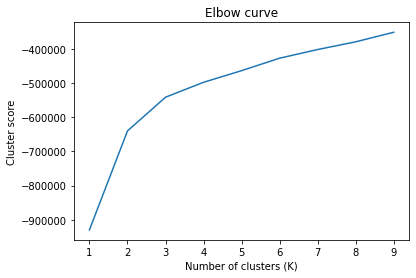

In [20]:
# Fit the models and create an elbow curve to help select a value of
# K that provides a good clustering outcome, wihtout overfitting the data.

# The cluster score for each value of k is calculated to determine
# the one that gives the best clustering outcome.
# The cluster score (WCSS) measures the (negative) sum of squared
# distances of observations to their closest cluster centroid,
# so a smaller score indicates a better clustering of the data.

# Note that this step may take a while to run as the kmeans model needs to be
# fitted 10 times.
score = [kmeans[k].fit(fraud_features_scaled).score(fraud_features_scaled) for
         k in range(len(kmeans))]

# Plot the elbow curve.
plt.plot(clusters,score)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Cluster score')
plt.title('Elbow curve')
plt.show()

The elbow curve shows a slight 'kink' at K = 2 and another at K = 3, suggesting that these might be good values of K to use such that the clustering produces a small sum of squared distances but does not overfit the training data.

The model below will use a value of K = 3.

In [21]:
# Find outliers in the clusters to identify potential cases of fraud.

# The steps below will flag cases as fraud if they are far from their
# cluster centroid. In other words, they will be flagged as fraud if they
# look unusual compared to other observations in their cluster.

# Extract the selected kmeans model with K = 3 from the list of all
# kmeans models fitted.
# Note: because indexing starts at 0, the model with K = 3 has the list index 2.
kmeans_selected = kmeans[2]

# Get the cluster number for each observation in the fraud dataset.
labels = kmeans_selected.predict(fraud_features_scaled)

# Get the cluster centroids so that the distance from each observation to the
# centroid can be calculated to select cases to be flagged as fraud.
centroids = kmeans_selected.cluster_centers_

# Calculate the distance between each observation and its cluster centroid.
distance = [np.linalg.norm(X-Z) for X,Z in zip(fraud_features_scaled,centroids[labels])]
  # np.linalg.norm is the 'norm' function from Numpy's linear algebra package
  # and is used to calculate the Euclidean distance between two points,
  # in this case between each observation (X) and its cluster centroid (Z).

# From the exploration of data above, it was seen that approximately 12% of
# Product Code C transactions were fraudulent. The code below will therefore
# classify an observation as fraudulent if its distance from its
# cluster centroid is above the 88th percentile of all distances in the cluster.

fraud_boundary = 88
fraud_prediction = np.array(distance)
fraud_prediction[distance>=np.percentile(distance, fraud_boundary)] = 1
  # Assign an observation as being fraudulent (1) if it is outside the
  # 88th percentile of observations in its cluster.
fraud_prediction[distance<np.percentile(distance, fraud_boundary)] = 0
  # Otherwise assigne the observation as being non fraudulent (0).
print(fraud_prediction)

[0. 0. 1. ... 0. 1. 0.]


### Evaluate model

Unsupervised learning often involves working with datasets that do not contain
response variable. In these cases, the output of a clustering algorithm can
be evaluated using internal or manual evaluation techniques as described in Section 6.3.5 of Module 6.

An example of **internal evaluation** was shown above when the clustering scor (WCSS) was calculated based on the sum of squared distances between observations and their centroid clusters.

In fraud detection exercises, **manual evaluation** might be carried out by showing a fraud expert the observations in the training dataset that were classified as fraud and asking them to evaluate the likelihood that these observations were in fact fraud.

In this case study, response variables are available in the dataset, so these can be used to conduct **external evaluation** by comparing known cases of fraud to predicted cases of fraud. This external evaluation is performed below.

The F1 score is 0.44971996990721397


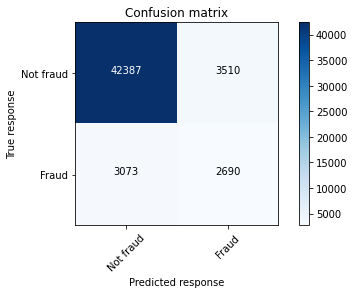

In [22]:
# Calculate and plot a confusion matrix to show True Positives, False Positives,
# True Negatives and False Negatives.

# Compute the confusion matrix.
cm = confusion_matrix(fraud_response, fraud_prediction) 
# Plot the confusion matrix.
plot_confusion_matrix(cm, classes = ['Not fraud','Fraud'])

# Calculate the F1 score for these predictions.
# F1 = 2 x (precision * recall) / (precision + recall).
print('The F1 score is '+str(f1_score(fraud_response, fraud_prediction)))



The confusion matrix shows that 2,690 (47%) of fraudulent transactions have been correctly classified as 'Fraud'. It also shows that 3,510 (8%) of non fraudulent transactions that predicted to be fraud.

This suggests that there is room to improve the model to make it a more helpful tool for the fraud detection team to use.

### Improve model
The model might be improved by trying different values for the fraud_boundary or K, or by experimenting with different features used in the clustering.

The code below tries some different values for the fraud_boundary and K.
You should also experiment to see if you can obtain better fraud predictions from the model, either by trying other values for fraud_coundary or K, or by trying different features to use in the clustering.

[0. 0. 0. ... 0. 0. 0.]


{'KMeans1 F1': 0.44971996990721397, 'KMeans2 F1': 0.46225863077823287}

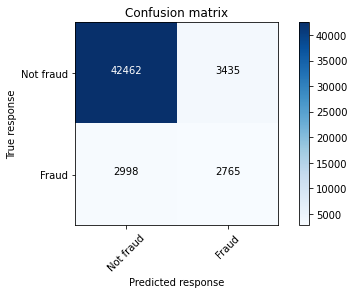

In [23]:
# Try different values for K.

# Extract the selected kmeans model with K = 4 from the list of all kmeans
# models fitted.
# Note: because indexing starts at 0, the model with K = 4 has the list index 3.
kmeans2 = kmeans[3]

# Get the cluster number for each observation in the fraud dataset.
labels2 = kmeans2.predict(fraud_features_scaled)

# Get the cluster centroids so that the distance from each observation to the
# centroid can be calculated to select cases to be flagged as fraud.
centroids2 = kmeans2.cluster_centers_

# Calculate the distance between each observation and the cluster centroid.
distance2 = [np.linalg.norm(X-Z) for X,Z in zip(fraud_features_scaled,
                                                centroids2[labels2])]

# This time the fraud_boundary will be set to 80 so that more transactions will be
# identified as fraud.
fraud_boundary2 = 80
fraud_prediction2 = np.array(distance2)
fraud_prediction2[distance2>=np.percentile(distance2, fraud_boundary)] = 1
fraud_prediction2[distance2<np.percentile(distance2, fraud_boundary)] = 0
print(fraud_prediction2)

# Calculate and plot a confusion matrix to show True Positives, False Positives,
# True Negatives and False Negatives.

cm = confusion_matrix(fraud_response, fraud_prediction2) 
plot_confusion_matrix(cm, classes = ['Not fraud','Fraud'])

# Compare the predictions from Kmeans1 and Kmeans2
{'KMeans1 F1':f1_score(fraud_response, fraud_prediction),
 'KMeans2 F1':f1_score(fraud_response, fraud_prediction2),
 }

This model has a slightly higher F1 score, indicating it provides a slightly better fraud prediction than the original model.

## Evaluation / observations
This fraud detection model:
- detects about 48% of true fraud cases in the training data (2,766 out of 5,763); and
- classifies about 7.5% of true non-fraud cases in the training data as being fraudulent (3,434 out of 45,897).

Further, of the 6,200 transactions classified as fraud, only 45% of them are actual cases of fraud.

Therefore, this model probably requires further refinement to avoid missing too many true cases of fraud and to avoid classifying too many non-fraud cases as fraud.

It is likely that another classifier, such as a GBM or a neural network, would make better fraud predictions based on the training data. However, the power of the model presented above is that it does not need examples of fraud to be able to make a reasonable attempt at detecting them. This means that this 'outlier' classifier might be better at identifying new types of fraud that emerge over time than another classifier might be.

Further, while this case study has not provided a very good classification of fraudulent transactions based on the training data, it has demonstrated how clustering might be used to detect outliers in a dataset.

### Afterword

The output of fraud detection is a 'short-list' of possible outliers. Incorrectly accusing someone of fraudulent behaviour can have very detrimental financial and reputational impacts on an organisation, as well as likely causing the accused individual significant stress. For this reason, the results of a fraud detection activity usually need to be reviewed manually by a human to determine whether fraud has occurred or is likely to occur in each case. Further monitoring and/or investigation might be required before deciding whether fraud has occurred. Again, when conducting fraud investigations, it is important to consider the potential harm that can be caused to someone undergoing investigation.

At the same time, letting fraud go undetected and uncorrected can also be very costly for an organisation. Therefore, it is important to track how well any fraud detection algorithm performs over time. As the nature of fraud changes over time, it is important to assess whether the algorithm is keeping pace with the changing environment.